In [126]:
import numpy as np
import matplotlib.pyplot as plt

In [127]:
data = np.genfromtxt("Arrhenius.dat", dtype=str)
Header = (data[0,:]).tolist()
solTchem = (data[1:,:]).astype(np.float)

In [128]:
np.shape(solTchem)

(5005, 10)

In [129]:
campsol = np.loadtxt("rxn_arrhenius_results.txt")

In [130]:
A_indx = Header.index('A')
B_indx = Header.index('B')
C_indx = Header.index('C')
D_indx = Header.index('D')
t_indx = Header.index('t')

In [131]:
print('a index = ', A_indx)
print('b index = ', B_indx)
print('c index = ', C_indx)
print('d index = ', D_indx)

a index =  6
b index =  7
c index =  8
d index =  9


In [132]:
niterT, Nvars = np.shape(solTchem)
Nsamples = len(np.where(solTchem[:,0]==-1)[0])
print('Number of Cells:',Nsamples)
print('Number of time iterations:',niterT/Nsamples)
solTchem = solTchem.reshape( int(niterT/Nsamples), Nsamples,Nvars)

Number of Cells: 5
Number of time iterations: 1001.0


In [133]:
print('shape tchem sol = ', np.shape(solTchem))
print('shape camp sol = ', np.shape(campsol))

shape tchem sol =  (1001, 5, 10)
shape camp sol =  (101, 9)


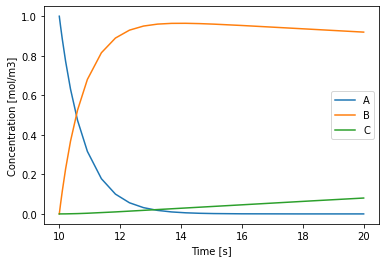

In [134]:
sp=0 # cell number 0, camp only saved cell No 1 
plt.figure()
plt.plot(solTchem[:,sp,t_indx],solTchem[:,sp,A_indx], label="A")
plt.plot(solTchem[:,sp,t_indx],solTchem[:,sp,B_indx], label="B")
plt.plot(solTchem[:,sp,t_indx],solTchem[:,sp,C_indx], label="C")
plt.xlabel('Time [s]')
plt.ylabel('Concentration [mol/m3]')
plt.legend(loc='best')

length tchem results =  1001
length camp results =  101
final tchem answer =  3.824691078e-06
initial tchem answer =  1.0
final camp answer =  6.804514053314442e-55
final tchem time =  20.0
camp time steps =  100.0


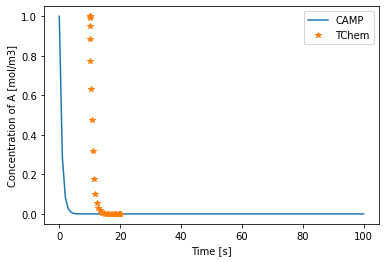

In [135]:
plt.figure()
plt.plot(campsol[:,0],campsol[:,1],label='CAMP')
plt.plot(solTchem[:,sp,t_indx],solTchem[:,sp,A_indx],"*",label='TChem')
plt.xlabel('Time [s]')
plt.ylabel('Concentration of A [mol/m3]')
plt.legend(loc='best')

print('length tchem results = ', len(solTchem[:,sp,t_indx]))
print('length camp results = ', len(campsol[:,0]))
print('final tchem answer = ', solTchem[-1,sp,A_indx])
print('initial tchem answer = ', solTchem[0,sp,A_indx])
print('final camp answer = ', campsol[-1,1])
print('final tchem time = ', solTchem[-1,sp,t_indx])

print('camp time steps = ', campsol[-1, 0])


final tchem answer =  0.91967225711
final camp answer =  0.405235314621205


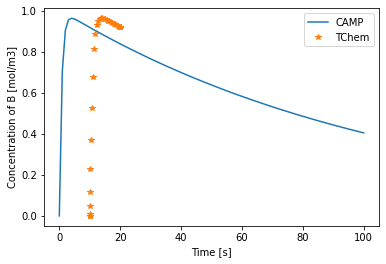

In [136]:
plt.figure()
plt.plot(campsol[:,0],campsol[:,3],label='CAMP')
plt.plot(solTchem[:,sp,t_indx],solTchem[:,sp,B_indx],"*",label='TChem')
plt.xlabel('Time [s]')
plt.ylabel('Concentration of B [mol/m3]')
plt.legend(loc='best')

print('final tchem answer = ', solTchem[-1,sp,B_indx])
print('final camp answer = ', campsol[-1,3])

final tchem answer =  0.080323918203
final camp answer =  0.5947646853787949


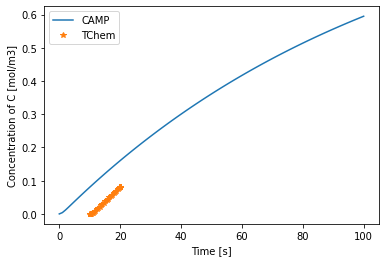

In [137]:
plt.figure()
plt.plot(campsol[:,0],campsol[:,5],label='CAMP')
plt.plot(solTchem[:,sp,t_indx],solTchem[:,sp,C_indx],"*",label='TChem')
plt.xlabel('Time [s]')
plt.ylabel('Concentration of C [mol/m3]')
plt.legend(loc='best')

print('final tchem answer = ', solTchem[-1,sp,C_indx])
print('final camp answer = ', campsol[-1,5])

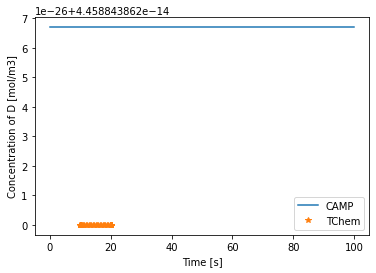

In [138]:
plt.figure()
plt.plot(campsol[:,0],campsol[:,7],label='CAMP')
plt.plot(solTchem[:,sp,t_indx],solTchem[:,sp,D_indx],"*",label='TChem')
plt.xlabel('Time [s]')
plt.ylabel('Concentration of D [mol/m3]')
plt.legend(loc='best')

In [139]:
import yaml
import sys, os, glob
main_data = {}
main_data['A'] = campsol[:,1].tolist()
main_data['B'] = campsol[:,3].tolist()
main_data['C'] = campsol[:,5].tolist()
main_data['D'] = campsol[:,7].tolist()
of = open('camp_output.yaml', 'w+')
yaml.safe_dump(main_data, of)
of.close()